## Joseph Rochelle
## Working with Correlation & Causation with Allen Downey's Thinkstats2


## Chapter 7, Correlations with scatter plots

In [7]:
## Adding the libraries from the text
## Please note that these are libraries that you must download to replicate 
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import brfss
import thinkstats2
import thinkplot
import first
import pandas as pd
import random

In [5]:
# THis exercise asks to plot the birthweight to mothers age
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [10]:
#Functions for correlations
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [11]:
## Computing Pearson and Spearmens correlaiton 
ages = live.agepreg
weights = live.totalwgt_lb
print('Corr', Corr(ages, weights))
print('SpearmanCorr', SpearmanCorr(ages, weights))

Corr 0.06883397035410908
SpearmanCorr 0.09461004109658226


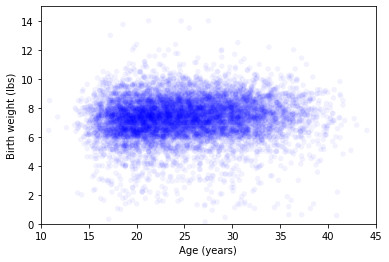

In [12]:
# The following are scatter pots 


def ScatterPlot(ages, weights, alpha=1.0, s=20):
    """Make a scatter plot and save it.

    ages: sequence of float
    weights: sequence of float
    alpha: float
    """
    thinkplot.Scatter(ages, weights, alpha=alpha)
    thinkplot.Config(xlabel='Age (years)',
                     ylabel='Birth weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)
    
ScatterPlot(ages, weights, alpha=0.05, s=10)

# Outocme 

- In conclusion the data is pretty flat at 0 meaning 0.07 for Pearson and 0.09 for Spearman. We know outliers can be the difference
- Correlations are stronger -1 to 1 so being this close to 0 is no linear relationship



## Chapter 8 Estimation with distrubutions 

Exercise: In this chapter we used  𝑥¯  and median to estimate µ, and found that  𝑥¯  yields lower MSE. Also, we used  𝑆2  and  𝑆2𝑛−1  to estimate σ, and found that  𝑆2  is biased and  𝑆2𝑛−1  unbiased. Run similar experiments to see if  𝑥¯  and median are biased estimates of µ. Also check whether  𝑆2  or  𝑆2𝑛−1  yields a lower MSE.

In [27]:
## Based off the chapter, we are to utilize libaries and functions to arrive at the estimation estimates. 
## The mean error and RMSM funcitons will tell us how different distrubutions are as you explroe them from the mean/median & variance

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [28]:

def Estimate4(n=7, iters=100000):
    """Mean error for xbar and median as estimators of population mean.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))
    
Estimate4()

Experiment 1
mean error xbar -0.0005735973005408556
mean error median 0.0004917115855708384


In [29]:
# Solution

def Estimate5(n=7, iters=100000):
    """RMSE for biased and unbiased estimators of population variance.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))
Estimate5()

Experiment 2
RMSE biased 0.5146937801508744
RMSE unbiased 0.5763845090692362


# Outcome
- The overall conclusion of the estimation of distrubutions is that if you examine them based off mean/median they are not biased. The reasons is as far as we can tell the mean moves the same direction 
- This is something that is more so a reason why some experiments we want to examine the mean and others the variance. 
- When we look the variance it yields a lower RMSE than unbiased and holds the same as the mean increases with variance. 


**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.


standard error 0.7804674059700384
confidence interval (1.2789220901360565, 3.569702990137045)


0.7804674059700384

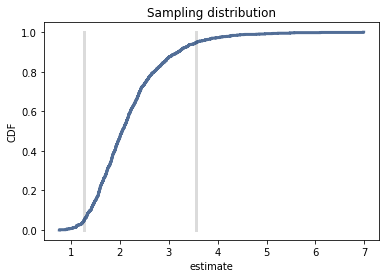

In [32]:
## THis code was taking from the solutions that adds "RANDOM" numbers. When ran, it will have different outcomes.
## The purpose of this sampling is to talk through the distrubitions and standard errors. 


def SimulateSample(lam=2, n=10, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()

# Outcome 

- The standard error is 0.78 etc.
- The convidence interval is 1.27, 3.5
- This tells us that if the sampling inceases so does the standard error and width of the CI (gray lines)

If the sample size changed, it would then change the standard error and convidence intervals. 